In [1]:
!python -m pip install --upgrade pip

In [10]:
!python -m pip install requests
!python -m pip install pandas 

Валюты

In [5]:
#!pip install pandas==1.3.5
#Доллар США (USD): R01235
#Евро (EUR): R01239
#Японская иена (JPY): R01820
#Британский фунт стерлингов (GBP): R01035
#Швейцарский франк (CHF): R01775

import pandas as pd

slov = {
    'EUR': 'R01239',
    'USD': 'R01239',
    'JPY': 'R01820',
    'GBP': 'R01035',
    'CHF': 'R01775'
}

def get_price(name):
    url = f"https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2020&date_req2=02/04/2024&VAL_NM_RQ={slov[name]}"
    df = pd.read_xml(url)
    return df

df = get_price('GBP')
df.to_csv('exchange_rates.csv', index=False)
result_active = df[['Date', 'Value']]
result_active


,Date,Value
0,01.01.2020,"81,3069"
1,10.01.2020,"80,2533"
2,11.01.2020,"80,0710"
3,14.01.2020,"79,2072"
4,15.01.2020,"79,6662"
...,...,...
1038,27.03.2024,"117,0605"
1039,28.03.2024,"116,9251"
1040,29.03.2024,"116,5187"
1041,30.03.2024,"116,6490"


# Глянь это

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [ ]:
df

,Date,Value
0,2020-01-01,"81,3069"
1,2020-01-10,"80,2533"
2,2020-01-11,"80,0710"
3,2020-01-14,"79,2072"
4,2020-01-15,"79,6662"
...,...,...
1038,2024-03-27,"117,0605"
1039,2024-03-28,"116,9251"
1040,2024-03-29,"116,5187"
1041,2024-03-30,"116,6490"


In [ ]:
df['day'] = df['Date'].apply(lambda x: x.day)
df['month'] = df['Date'].apply(lambda x: x.month)
df['year'] = df['Date'].apply(lambda x: x.year)

In [ ]:
df

,Date,Value,day,month,year
0,2020-01-01,"81,3069",1,1,2020
1,2020-01-10,"80,2533",10,1,2020
2,2020-01-11,"80,0710",11,1,2020
3,2020-01-14,"79,2072",14,1,2020
4,2020-01-15,"79,6662",15,1,2020
...,...,...,...,...,...
1038,2024-03-27,"117,0605",27,3,2024
1039,2024-03-28,"116,9251",28,3,2024
1040,2024-03-29,"116,5187",29,3,2024
1041,2024-03-30,"116,6490",30,3,2024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1043 non-null   datetime64[ns]
 1   Value   1043 non-null   object        
 2   day     1043 non-null   int64         
 3   month   1043 non-null   int64         
 4   year    1043 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 40.9+ KB


In [ ]:
df['Value'] = df['Value'].map(lambda x: float(x.replace(',', '.')))

In [ ]:
df

,Date,Value,day,month,year
0,2020-01-01,81.3069,1,1,2020
1,2020-01-10,80.2533,10,1,2020
2,2020-01-11,80.0710,11,1,2020
3,2020-01-14,79.2072,14,1,2020
4,2020-01-15,79.6662,15,1,2020
...,...,...,...,...,...
1038,2024-03-27,117.0605,27,3,2024
1039,2024-03-28,116.9251,28,3,2024
1040,2024-03-29,116.5187,29,3,2024
1041,2024-03-30,116.6490,30,3,2024


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Преобразование данных в числовой формат с заменой запятых на точки
# df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

X = df.drop(columns=['Value'])
y = df['Value']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Инициализация и обучение модели
model = GradientBoostingRegressor()
model.fit(X_train.drop(columns=['Date']), y_train)

predictions = model.predict(X_test.drop(columns=['Date']))
X_test['Predicted_Value'] = predictions
X_test['true_target'] = y_test

r2_score(y_true=y_test, y_pred=predictions)

0.9333925599626312

In [ ]:
X_test_chek = X_test.copy()
X_test_chek.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=False)
X_test_chek = X_test_chek.sort_index()
X_test_chek = X_test_chek.reset_index()

In [ ]:
X_test_chek

,Date,day,month,year,Predicted_Value,true_target
0,2020-01-23,23,1,2020,81.230575,80.6752
1,2020-02-11,11,2,2020,82.377559,82.1177
2,2020-02-20,20,2,2020,82.904513,82.8827
3,2020-02-21,21,2,2020,82.904513,82.2263
4,2020-03-05,5,3,2020,93.784330,84.5011
...,...,...,...,...,...,...
100,2023-12-28,28,12,2023,116.895335,116.0620
101,2024-02-03,3,2,2024,113.502157,114.9783
102,2024-02-29,29,2,2024,116.284074,116.5177
103,2024-03-22,22,3,2024,116.708669,116.8775


In [ ]:
X_test_chek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             105 non-null    datetime64[ns]
 1   day              105 non-null    int64         
 2   month            105 non-null    int64         
 3   year             105 non-null    int64         
 4   Predicted_Value  105 non-null    float64       
 5   true_target      105 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 5.0 KB


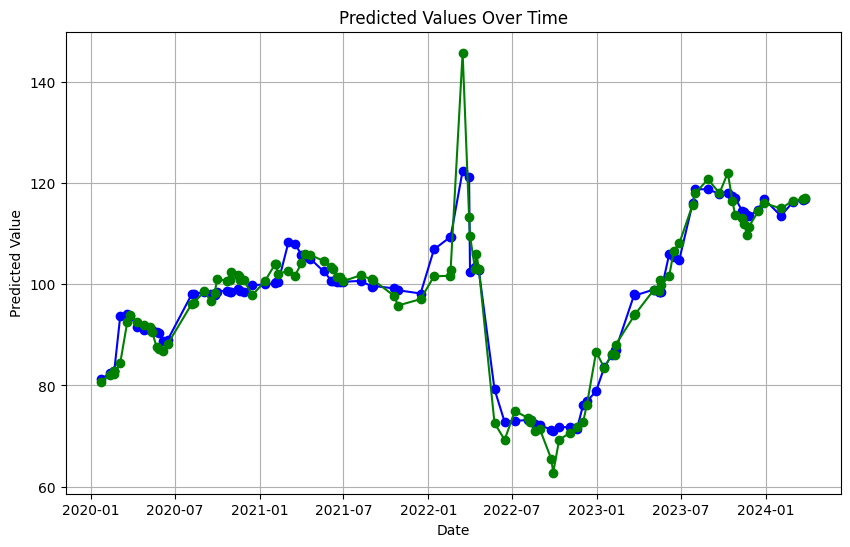

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test_chek['Date'], X_test_chek['Predicted_Value'], marker='o', color='b', linestyle='-')
plt.plot(X_test_chek['Date'], X_test_chek['true_target'], marker='o', color='g', linestyle='-')
plt.title('Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test['Date'], X_test['Predicted_Value'], marker='o', color='b', linestyle='-')
plt.title('Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.show()

,Date,Value,day,month,year
0,2020-01-01,81.3069,1,1,2020
1,2020-01-10,80.2533,10,1,2020
2,2020-01-11,80.0710,11,1,2020
3,2020-01-14,79.2072,14,1,2020
4,2020-01-15,79.6662,15,1,2020
...,...,...,...,...,...
1038,2024-03-27,117.0605,27,3,2024
1039,2024-03-28,116.9251,28,3,2024
1040,2024-03-29,116.5187,29,3,2024
1041,2024-03-30,116.6490,30,3,2024


from matplotlib import pyplot as plt
df['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Value', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='day', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='month', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

Акции

In [11]:
import requests
import pandas as pd

url = ' XML_dynamic.asp?UniDbQuery.Posted=True&UniDbQuery.From=17.09.2013&UniDbQuery.To=02.04.2024'
response = requests.get(url)

df2 = pd.read_xml(url)
df2

ImportError: lxml not found, please install or use the etree parser.